# Practice 8 - k-Means and Hierarchical Clustering

We will work again on the iris data set. The data have labels here, but we will check if unsupervised learning can make good guesses.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.cluster import AgglomerativeClustering

In [2]:
dataset = pd.read_csv('iris.csv')

*This small dataset from 1936 is often used for testing out machine learning algorithms and visualizations. Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.*

In [3]:
dataset.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
122,7.7,2.8,6.7,2.0,virginica
62,6.0,2.2,4.0,1.0,versicolor
28,5.2,3.4,1.4,0.2,setosa
45,4.8,3.0,1.4,0.3,setosa
123,6.3,2.7,4.9,1.8,virginica


## Your Task

* Plot **sepal width** vs. **sepal length** with colors corresponding to the species
* Train a k-Means model for 3 clusters and plot the results.
* Train a Hierarchical Clustering model for 3 clusters and plot the results. Compare different linkage methods.
* Do again the first three steps now with **petal width** vs. **petal length**
* Visually, which 2D plane seems to be the most convenient for clustering?

# 1 Plot sepal width vs. sepal length with colors corresponding to the species

In [4]:
dataset['species'].replace({'versicolor':'blue', 'virginica':'red','setosa':'green'})

0      green
1      green
2      green
3      green
4      green
       ...  
145      red
146      red
147      red
148      red
149      red
Name: species, Length: 150, dtype: object

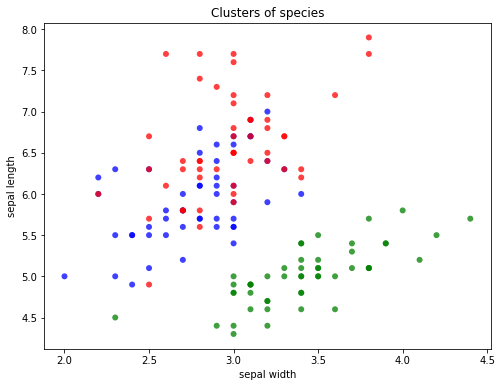

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(dataset['sepal_width'], dataset['sepal_length'], c = dataset['species'].replace({'versicolor':'blue', 'virginica':'red','setosa':'green'}), alpha=0.75, lw=0)
plt.title('Clusters of species')
plt.xlabel('sepal width')
plt.ylabel('sepal length')
plt.show()

# 2 Train a k-Means model for 3 clusters and plot the results.

In [6]:
X = dataset[['sepal_width', 'sepal_length']]
X.head()

,sepal_width,sepal_length
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0


#### Training the K-Means model on the dataset

In [7]:
k = 3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [8]:
y_pred = kmeans.predict(X)
print(y_pred[:150])
np.unique(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


array([0, 1, 2])

### Visualising the clusters

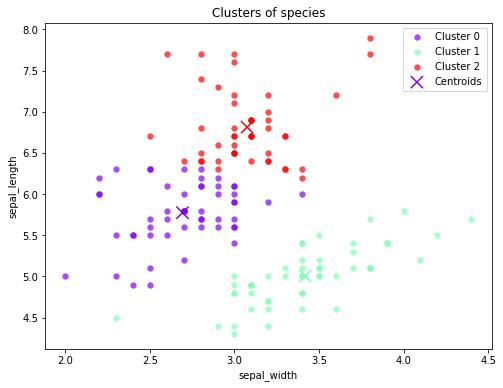

In [9]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X.iloc[y_pred == i, 0], X.iloc[y_pred == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

# Plot final centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, marker = 'x', c = [color_list(i) for i in range(k)], label = 'Centroids')

plt.title('Clusters of species')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

# 3 Train a Hierarchical Clustering model for 3 clusters and plot the results. Compare different linkage method

In [10]:

k=3
hc_average = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')
y_hc_average = hc_average.fit_predict(X)

In [11]:
hc_complete = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')
y_hc_complete = hc_complete.fit_predict(X)

In [12]:
hc_single= AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'single')
y_hc_single = hc_single.fit_predict(X)

In [13]:
hc_ward = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
y_hc_ward = hc_ward.fit_predict(X)

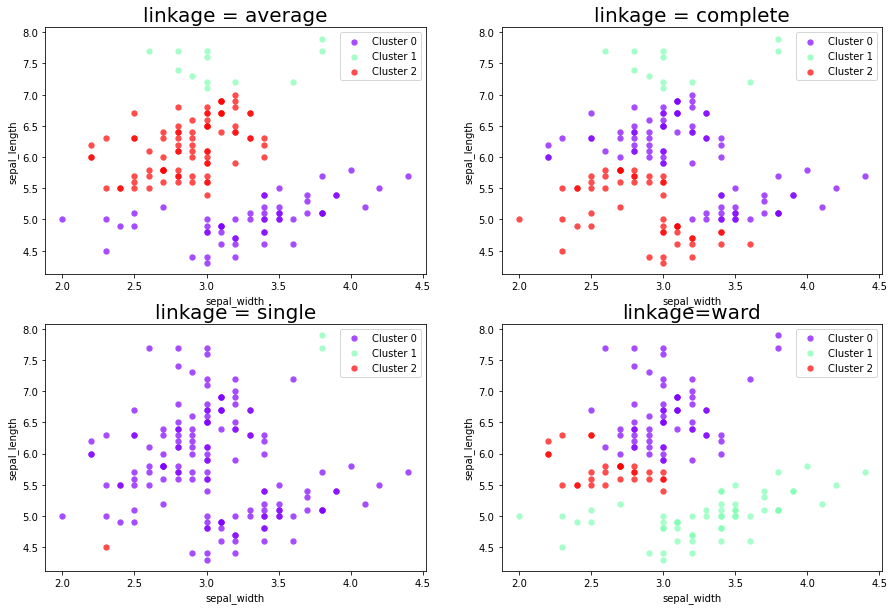

In [14]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)  
color_list = plt.cm.get_cmap('rainbow', k)
for i in range(k):
    plt.scatter(X.iloc[y_hc_average == i, 0], X.iloc[y_hc_average == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('linkage = average',fontsize = 20)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()

plt.subplot(2, 2, 2)   
for i in range(k):
    plt.scatter(X.iloc[y_hc_complete == i, 0], X.iloc[y_hc_complete == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('linkage = complete',fontsize = 20)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()

plt.subplot(2, 2, 3)  
for i in range(k):
    plt.scatter(X.iloc[y_hc_single == i, 0], X.iloc[y_hc_single == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('linkage = single',fontsize = 20)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()

plt.subplot(2, 2, 4)     
for i in range(k):
    plt.scatter(X.iloc[y_hc_ward == i, 0], X.iloc[y_hc_ward == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('linkage=ward',fontsize = 20)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()


Based on the result.we can see that linkage average and linkage complete work better.They separate distinct groups, and the distances between common groups tend to be close together.
Single link is the worst strategy and Ward offers the most common sizes.

# 4 Do again the first three steps now with petal width vs. petal length

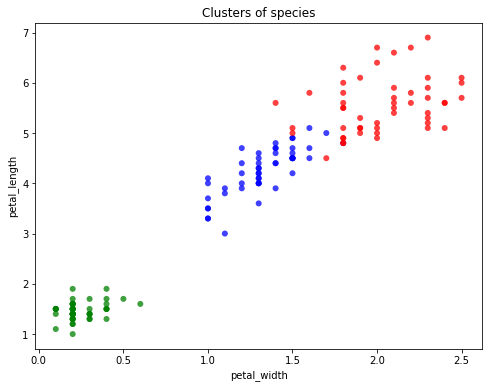

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(dataset['petal_width'], dataset['petal_length'], c = dataset['species'].replace({'versicolor':'blue', 'virginica':'red','setosa':'green'}), alpha=0.75, lw=0)
plt.title('Clusters of species')
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.show()

Train a k-Means model for 3 clusters and plot the results

In [16]:
X1 = dataset[['petal_width', 'petal_length']]
X1.head()

,petal_width,petal_length
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4


Training the K-Means model on the dataset

In [17]:
k = 3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(X1)

KMeans(n_clusters=3, random_state=0)

In [18]:
y_pred = kmeans.predict(X1)
print(y_pred[:150])
np.unique(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


array([0, 1, 2])

### Visualising the clusters

In [19]:

k=3
hc_average = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')
y_hc_average = hc_average.fit_predict(X1)

In [20]:
hc_complete = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')
y_hc_complete = hc_complete.fit_predict(X1)

In [21]:
hc_single= AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'single')
y_hc_single = hc_single.fit_predict(X1)

In [22]:
hc_ward = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
y_hc_ward = hc_ward.fit_predict(X1)

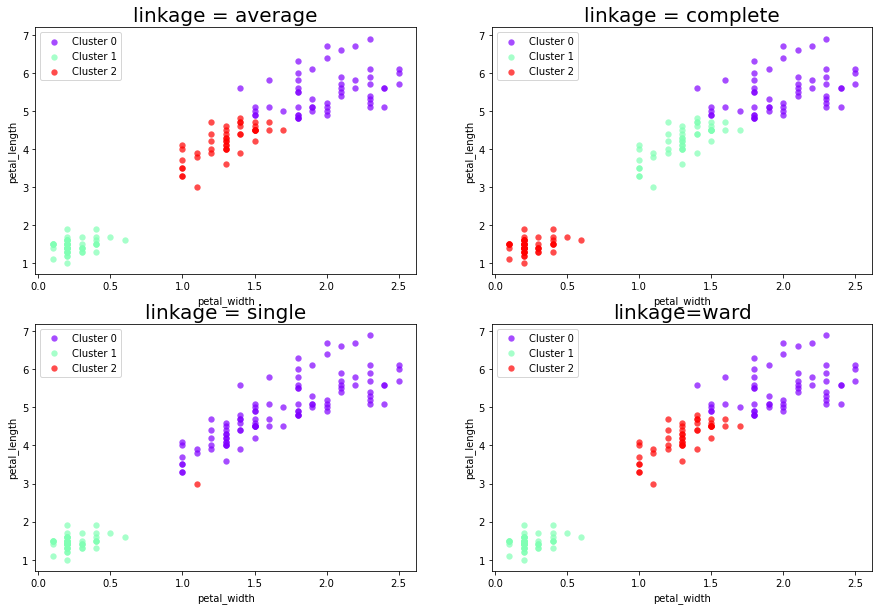

In [23]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)  
color_list = plt.cm.get_cmap('rainbow', k)
for i in range(k):
    plt.scatter(X1.iloc[y_hc_average == i, 0], X1.iloc[y_hc_average == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('linkage = average',fontsize = 20)
plt.xlabel(X1.columns[0])
plt.ylabel(X1.columns[1])
plt.legend()



plt.subplot(2, 2, 2)   
for i in range(k):
    plt.scatter(X1.iloc[y_hc_complete == i, 0], X1.iloc[y_hc_complete == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('linkage = complete',fontsize = 20)
plt.xlabel(X1.columns[0])
plt.ylabel(X1.columns[1])
plt.legend()


plt.subplot(2, 2, 3)  
for i in range(k):
    plt.scatter(X1.iloc[y_hc_single == i, 0], X1.iloc[y_hc_single == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('linkage = single',fontsize = 20)
plt.xlabel(X1.columns[0])
plt.ylabel(X1.columns[1])
plt.legend()


plt.subplot(2, 2, 4)     
for i in range(k):
    plt.scatter(X1.iloc[y_hc_ward == i, 0], X1.iloc[y_hc_ward == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('linkage=ward',fontsize = 20)
plt.xlabel(X1.columns[0])
plt.ylabel(X1.columns[1])
plt.legend()


# Visually, which 2D plane seems to be the most convenient for clustering?

all the above methods are most convenient for clustering in 2D except single linkage.